<a href="https://colab.research.google.com/github/alibgil/Old_car_price_prediction/blob/main/Old_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Old car price prediction**

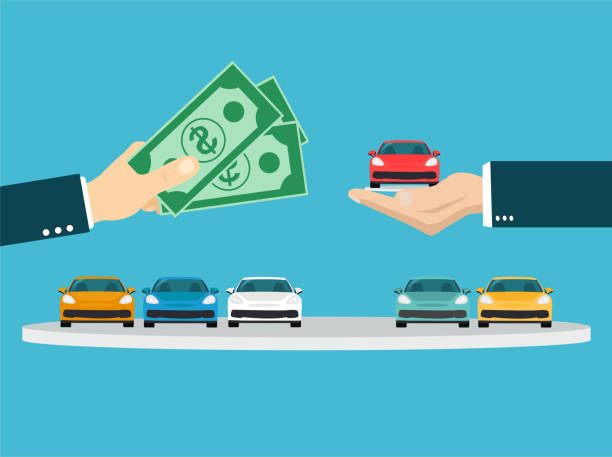

Este conjunto de datos contiene información sobre el nombre del automóvil antiguo, los kilómetros recorridos, el tipo de combustible, el tipo de transmisión, el año de fabricación, el CC del motor, el número de asientos, etc. y podemos usarlo para el problema de predicción del precio del automóvil antiguo con modelos de Regresión.

| Variable            |
|---------------------|
| car_name            |
| car_prices_in_rupee |
| kms_driven          |
| fuel_type           |
| transmission        |
| ownership           |
| manufacture         |
| engine              |
| Seats               |

##Fuentes de datos


[Kaggle](https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction)


[Data source](https://www.cardekho.com/used-car-details)

In [104]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

In [105]:
#Base de datos
from google.colab import drive
drive.mount('/content/drive')

filename= '/content/drive/MyDrive/BootCamp/ML/car_price.csv'

df = pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


### I.- Análisis Exploratorio

**Manipulación de datos**

In [106]:
#Eliminar columna index
df = df.drop('Unnamed: 0', axis=1)
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [107]:
#inspect the data
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB
None 

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64


No se visualizan valores nulos

In [108]:
#Identificación categorías
cat_var = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ]
for cat in cat_var:
  print(df[cat].value_counts())

Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: car_name, Length: 1896, dtype: int64
4.50 Lakh     62
3.50 Lakh     62
3 Lakh        58
6.50 Lakh     57
5.50 Lakh     52
              ..
12.03 Lakh     1
15.62 Lakh     1
7.92 Lakh      1
29.25 Lakh     1
31.90 Lakh     1
Name: car_prices_in_rupee, Length: 1300, dtype: int64
80,000 kms      163
1,20,000 kms    146
60,000 kms      142
50,000 kms      136
70,000 kms      132
               ... 
79,385 kms        1
51,242 kms        1
38,733 kms        1
77,385 kms        1
85,002 kms        1
Name: kms_driven, Length: 2610, dtype: int64
Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: fuel_typ

Se evidencia que la base de datos contiene 10 columnas, la cual nos provee solo 3 características: fuel_type, transmission y Seats. Por lo tanto, para esta limpieza tenemos el reto asignar la tipología correspondiente a cada variable, pero lo mas retador es identificar si todas las variables nos aportan valor

In [109]:
#transformar datos de crore a lakhs
filtro= df[df.car_prices_in_rupee.str.contains('Crore')]
filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee'].str.replace(' Crore', '').astype(float)
filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee']* 100
filtro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 119 to 5483
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             56 non-null     object 
 1   car_prices_in_rupee  56 non-null     float64
 2   kms_driven           56 non-null     object 
 3   fuel_type            56 non-null     object 
 4   transmission         56 non-null     object 
 5   ownership            56 non-null     object 
 6   manufacture          56 non-null     int64  
 7   engine               56 non-null     object 
 8   Seats                56 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.4+ KB


<ipython-input-109-3e91f4e2fb69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee'].str.replace(' Crore', '').astype(float)
<ipython-input-109-3e91f4e2fb69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro['car_prices_in_rupee']= filtro['car_prices_in_rupee']* 100


In [110]:
#Quitar Crore y limpiar car_prices
df.drop(df[df.car_prices_in_rupee.str.contains('Crore')].index, inplace=True)
df['car_prices_in_rupee']= df['car_prices_in_rupee'].str.replace(',', '.')
df['car_prices_in_rupee']= df['car_prices_in_rupee'].str.replace(' Lakh', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5456 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5456 non-null   object 
 1   car_prices_in_rupee  5456 non-null   float64
 2   kms_driven           5456 non-null   object 
 3   fuel_type            5456 non-null   object 
 4   transmission         5456 non-null   object 
 5   ownership            5456 non-null   object 
 6   manufacture          5456 non-null   int64  
 7   engine               5456 non-null   object 
 8   Seats                5456 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 426.2+ KB


In [111]:
#Unir información
df= df.append(filtro)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5483
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   object 
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   object 
 8   Seats                5512 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 430.6+ KB


In [112]:
#Limpiar variables

#kms_driven
df['kms_driven']= df['kms_driven'].str.replace(',', '')
df['kms_driven']= df['kms_driven'].str.replace(' kms', '').astype(int)

#Seats
df['Seats']= df['Seats'].str.replace(' Seats', '').astype(int)

#engine
df['engine']= df['engine'].str.replace(' cc', '').astype(int)

#manufacture
df['manufacture']= df['manufacture'].astype(str)

In [113]:
#Homologación catagorías
df['ownership']= df['ownership'].replace({'0th Owner': '0', '1st Owner': '1', '2nd Owner': '2', '3rd Owner': '3', '4th Owner': '4', '5th Owner': '5'}).astype(int)

In [114]:
#Cantidad de valores duplicados
df.duplicated().sum()

76

Se identifican 76 valores duplicados

In [115]:
#Se identifican valores duplicados de la BD
df1 = df[df.duplicated(keep=False)]

df1 = df1.groupby(df1.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
df1= np.array(df1)
filtered_df=df.iloc[df1.flatten()]
filtered_df

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1232,Land Rover Range Rover Velar R-Dynamic S Petro...,85.00,38000,Petrol,Automatic,1,2020,1197,5
1576,Maruti Swift Dzire VXI,3.67,84728,Petrol,Manual,2,2015,1968,5
3748,Nissan Magnite XL,5.47,25166,Petrol,Manual,1,2021,1396,5
4325,Jeep Compass 1.4 Longitude Plus AT,16.90,78000,Petrol,Automatic,1,2018,1197,5
2938,Audi A6 35 TDI,19.80,85000,Diesel,Automatic,1,2015,1086,5
...,...,...,...,...,...,...,...,...,...
1389,Hyundai i20 Asta 1.4 CRDi,3.50,38931,Diesel,Manual,1,2013,1396,5
1125,Maruti Baleno 1.2 Alpha,6.30,36438,Petrol,Manual,2,2018,2179,7
1398,BMW 3 Series Luxury Edition,44.50,9200,Diesel,Automatic,1,2020,2755,7
1566,Toyota Innova Crysta 2.8 GX AT BSIV,18.75,26000,Diesel,Automatic,1,2018,4461,7


In [116]:
#Se procede con la eliminación de los valores repetidos
df= df.drop_duplicates()

In [117]:
#inspect the data
print(df.info(), '\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5483
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5436 non-null   object 
 1   car_prices_in_rupee  5436 non-null   float64
 2   kms_driven           5436 non-null   int64  
 3   fuel_type            5436 non-null   object 
 4   transmission         5436 non-null   object 
 5   ownership            5436 non-null   int64  
 6   manufacture          5436 non-null   object 
 7   engine               5436 non-null   int64  
 8   Seats                5436 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 424.7+ KB
None 

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64


Se realiza la limpieza de los datos donde se evidencia cambio de tipología, homologación de categorías, identificación de valores faltantes y eliminación de datos duplicados.

**Visualizaciones**

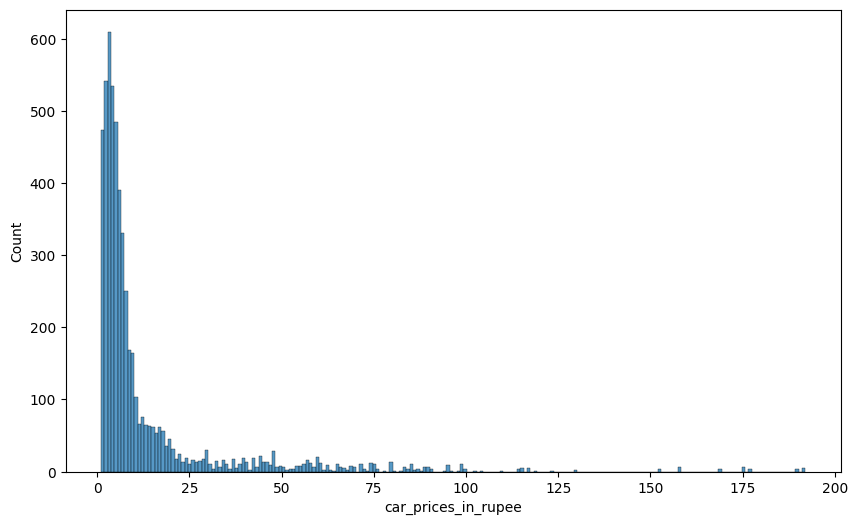

In [118]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df.car_prices_in_rupee)
plt.show()

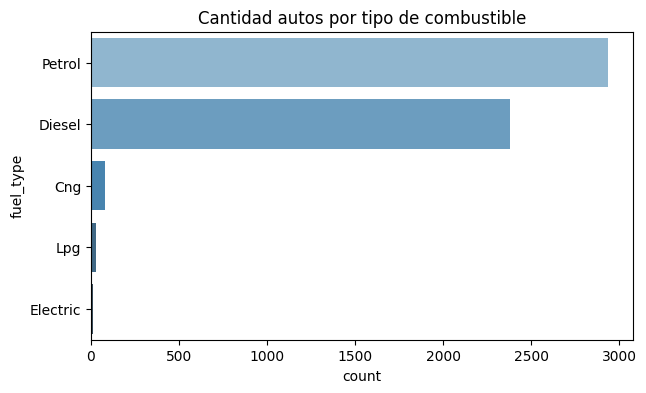

In [119]:
# bar plot: fuel_type

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="fuel_type",
    data=df,
    order=df['fuel_type'].value_counts().index,
    palette="Blues_d",
    linewidth=3
)
plt.title('Cantidad autos por tipo de combustible')
plt.show()

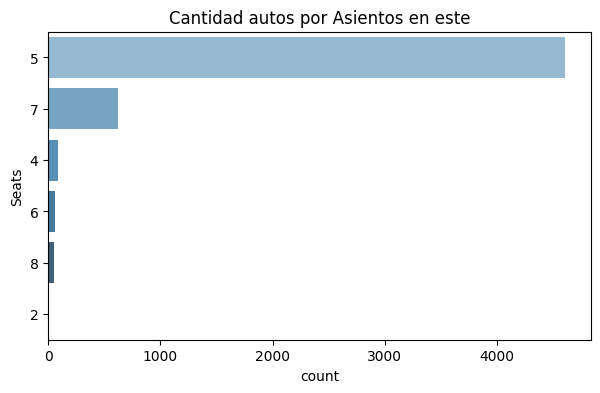

In [120]:
# bar plot: fuel_type

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="Seats",
    data=df,
    order=df['Seats'].value_counts().index,
    palette="Blues_d",
    linewidth=3
)
plt.title('Cantidad autos por Asientos en este')
plt.show()

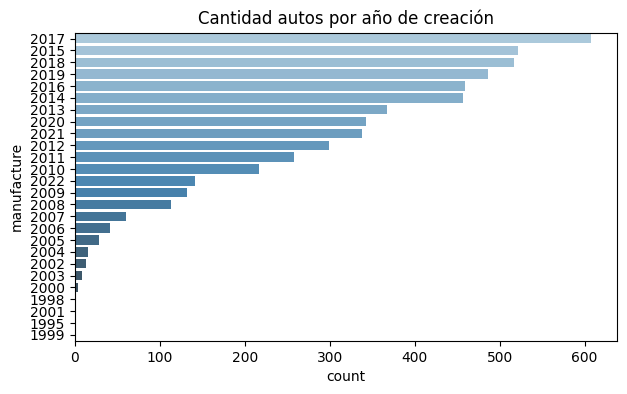

In [121]:
# bar plot: fuel_type

plt.style.use('default')
plt.figure(figsize=(7,4))

plotting = sns.countplot(
    y="manufacture",
    data=df,
    order=df['manufacture'].value_counts().index,
    palette="Blues_d",
    linewidth=3
)
plt.title('Cantidad autos por año de creación')
plt.show()

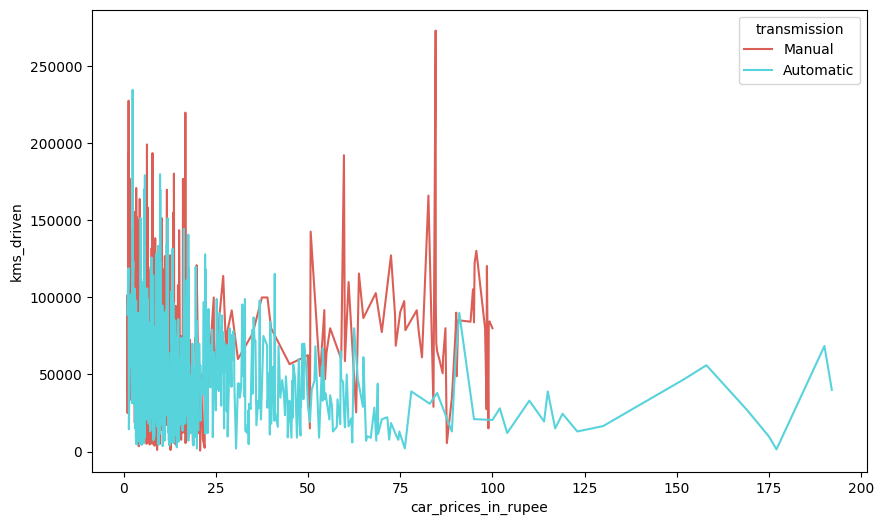

In [122]:
# grafico de linea
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='car_prices_in_rupee',
    y='kms_driven',
    hue='transmission',# color por Transmisión
    data=df,
    ci = None,
    palette=palette
)   
plt.show()

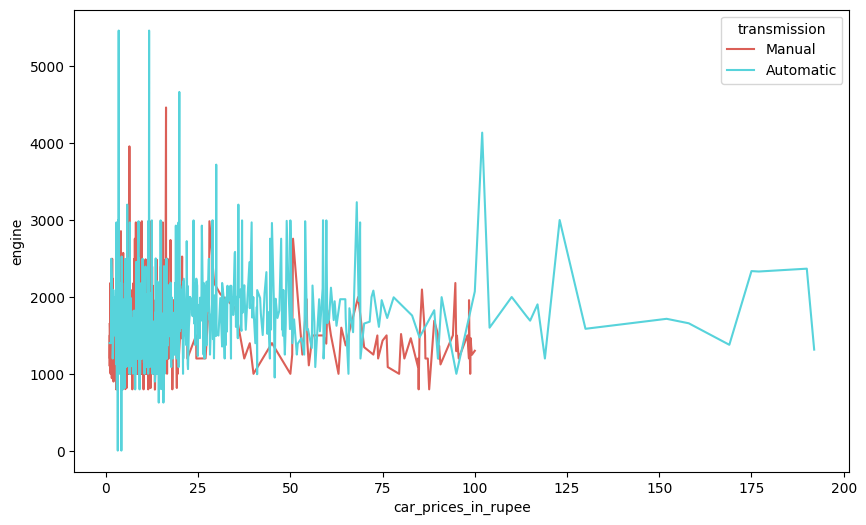

In [123]:
# grafico de linea
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='car_prices_in_rupee',
    y='engine',
    hue='transmission',# color por Transmisión
    data=df,
    ci = None,
    palette=palette
)   
plt.show()

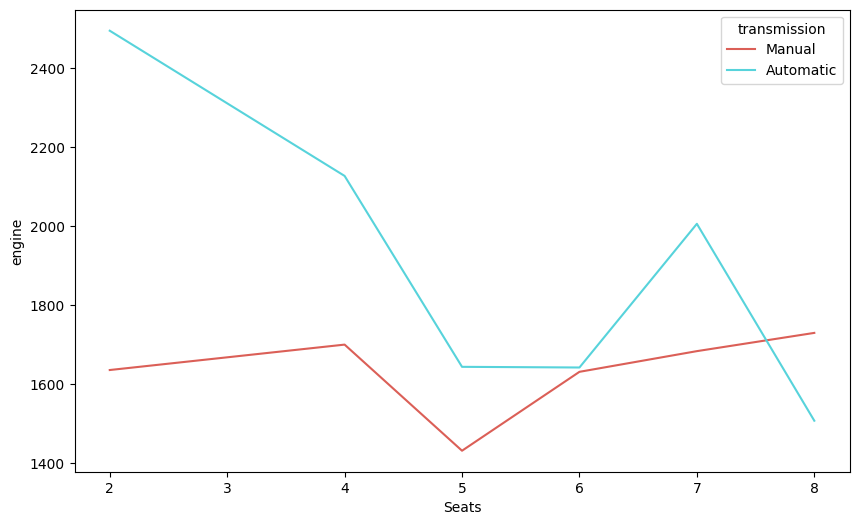

In [124]:
# grafico de linea
plt.figure(figsize=(10, 6))
palette = sns.color_palette("hls", 2)

sns.lineplot(
    x='Seats',
    y='engine',
    hue='transmission',# color por Transmisión
    data=df,
    ci = None,
    palette=palette
)   
plt.show()

In [125]:
# formato wide
df.pivot_table(index="manufacture", 
                                     columns=["fuel_type", "transmission"],
                                     values="car_prices_in_rupee", 
                                     fill_value='', 
                                     aggfunc=pd.np.max)

<ipython-input-125-1cf16c050948>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  aggfunc=pd.np.max)


fuel_type       Cng    Diesel          Electric     Lpg    Petrol        
transmission Manual Automatic  Manual Automatic  Manual Automatic  Manual
manufacture                                                              
1995                              2.6                                    
1998                                                                 60.0
1999                                                                 35.0
2000                                                                 65.0
2001                             1.75                                80.0
2002                              1.8                         6.1    84.0
2003                             75.0                                99.0
2004                              4.9                        90.0    95.0
2005                             99.0                        2.25    98.9
2006                     6.85    70.0                         5.0    90.0
2007                      9.5    55.0            63.803      13.5  99.999
2008                     2.45    89.0            98.429      9.25  98.754
2009                    11.02     8.5              90.0       4.0  98.497
2010            1.8     23.75    8.79              70.0     15.25  90.316
2011           1.91      54.0  84.602              1.76      35.0  99.205
2012           2.45      22.9    95.0               2.5     29.75    85.0
2013           3.15     39.75  95.633              2.81      68.9     6.5
2014           4.86     47.75    17.5      3.21     2.8      12.9  86.503
2015           6.75      91.0   14.14      23.0              64.9  98.414
2016           7.25      66.0    15.0               2.6      33.8    10.5
2017           6.52      83.0   28.05                       152.0    9.95
2018           7.05     158.0    22.0               2.2      65.0    14.0
2019            6.1     190.0    37.5      6.31             192.0   15.65
2020           9.06     130.0   29.32      21.1             175.0   16.95
2021            7.5     130.0   20.65     21.85             175.0   18.07
2022            7.5     177.0   22.06      15.5              74.5   20.75

En la vista anterior podemos ver el precio del carro según año de construcción, tipo de combustible y transmisión.

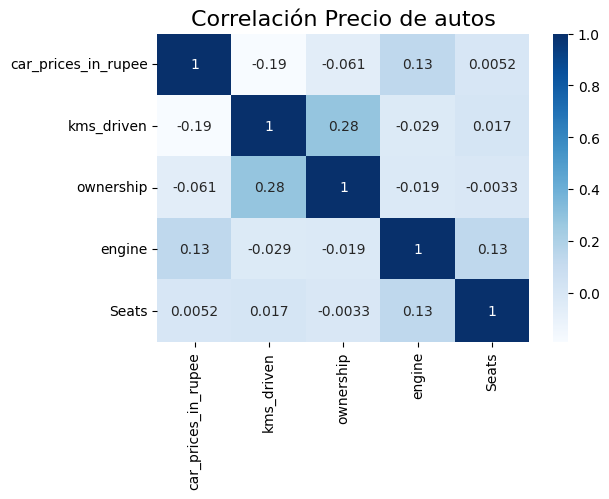

In [126]:
# Se realiza mapa de calor con las correlaciones de las variables
corr = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot = True, cmap = 'Blues')
plt.title('Correlación Precio de autos', fontsize = 16)
plt.show()

**Preprocesamiento**

Realizaremos una transformación de las variables categoricas y escalamiento de las númericas para tener un modelo de prodección mas acertado

In [127]:
# Instanciar selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [128]:
# Instanciar transformadores
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [129]:
# Instanciar pipelines
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [130]:
#Instanciar transformador de columnas

# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb6c3cd2880>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb6c3cd2490>)])

In [131]:
# Escalar variable objetivo

# ajusten el escalador en los datos de entrenamiento
scaler.fit(df[['car_prices_in_rupee']])
df['car_prices_in_rupee'] = scaler.transform(df[['car_prices_in_rupee']])
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,-0.145807,86226,Diesel,Manual,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,-0.017435,13248,Petrol,Automatic,1,2021,1330,5
2,Toyota Camry 2.5 G,0.146240,60343,Petrol,Automatic,1,2016,2494,5
3,Honda Jazz VX CVT,-0.249422,26696,Petrol,Automatic,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,-0.369542,69414,Petrol,Manual,1,2016,1199,5


In [132]:
# División de valores
X = df.drop('car_prices_in_rupee', axis=1)
y = df['car_prices_in_rupee']

In [133]:
#Transformar datos

# fit on train
preprocessor.fit(X)

X_processed = preprocessor.transform(X)
X_processed

array([[ 0.54538258, -0.60198628,  0.72833159, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19394661, -0.60198628, -0.34934376, ...,  0.        ,
         1.        ,  0.        ],
       [-0.07150275, -0.60198628,  1.65451265, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.8661868 , -0.60198628,  1.05025698, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3895146 ,  0.81586355,  0.78858501, ...,  0.        ,
         0.        ,  0.        ],
       [-1.27135817, -0.60198628,  2.86646704, ...,  0.        ,
         0.        ,  0.        ]])

In [134]:
# Comprobación de los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_processed).sum().sum(), 'missing values data')
print('\n')
print('All data in df are', X_processed.dtype)
print('\n')
print('shape of data is', X_processed.shape)
print('\n')

0 missing values data


All data in df are float64


shape of data is (5436, 1933)




Se evidencia una correcta transformación de los datos sin ningun campo vacio

In [135]:
#Concatenar todas las características de vuelta a un DataFrame.
df_processed = pd.DataFrame(X_processed)
df_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932
0,0.545383,-0.601986,0.728332,-0.349101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-1.193947,-0.601986,-0.349344,-0.349101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.071503,-0.601986,1.654513,-0.349101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.873432,-0.601986,-0.574864,-0.349101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.144692,-0.601986,-0.574864,-0.349101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
#Dividir modelos
X_train, X_test, y_train, y_test = train_test_split(df_processed, y, random_state=42)

### II.- Modelos

Para la predicción del precio de autos usados, probaremos varios modelos de Regresión y se verificará cual es el que mas nos conviene según las metricas correspondientes.

**Bagged trees**


In [137]:
#Instanciar modelo
bagreg = BaggingRegressor(random_state = 42)

# Hiperparámetros
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [138]:
#Entrenar modelo
bagreg.fit(X_train, y_train)

#Predicción de valores
bagreg.predict(X_test)

array([-0.32919637,  0.25641123, -0.53229993, ...,  0.40083024,
       -0.48136357, -0.3431798 ])

In [139]:
#Rendimiento de modelo
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9398099326559568
0.6404980890297463


In [140]:
# Parámetros para ajustar modelo
# Lista de valores a probar para n_estimators:
n_estimators_range = list(range(10, 50))# will try every value between 2 and 1000
# Lista para almacenar la puntuación para cada valor de n_estimators:
r2 = []
for est in n_estimators_range:
    bagreg = BaggingRegressor(n_estimators= est, random_state = 42)
    bagreg.fit(X_train, y_train)
    score = bagreg.score(X_test, y_test)
    r2.append(score)

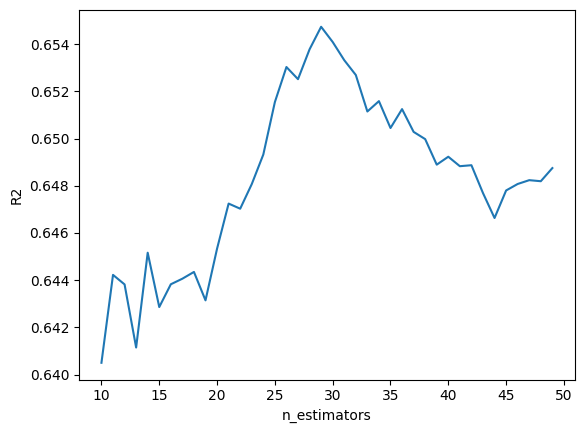

In [141]:
# Visualizar qué n_estimators lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(n_estimators_range, r2)
plt.xlabel('n_estimators')
plt.ylabel('R2');

In [142]:
# Modelo con nuestro valor optimizado para max_depth
bagreg2 = BaggingRegressor(n_estimators= 29, random_state = 42)
bagreg2.fit(X_train, y_train)
train_bg_score = bagreg2.score(X_train, y_train)
test_bg_score = bagreg2.score(X_test, y_test)
print(train_bg_score)
print(test_bg_score)

0.9540839797746055
0.6547392927961184


Se realiza ajuste de hiperparámetros obteniendo un resultado mas ajustado y optimizado. Con este cambio se procede con la predicción

In [143]:
#Nueva Prediccoón
Bg_predict= bagreg2.predict(X_test)

**Regresión de bosque aleatorio**

In [144]:
#Instanciar modelo
RandomForestRegressor(random_state = 42)
rf = RandomForestRegressor(random_state = 42)

#Hiperparámetros
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [145]:
#Entrenar modelo
rf.fit(X_train, y_train)

#Predicción de valores
rf.predict(X_test)

array([-0.28874071,  0.18902487, -0.53946586, ...,  0.39136277,
       -0.47747114, -0.27839298])

In [146]:
#Rendimiento de modelo
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9569140564433055
0.6518097257693563


In [147]:
#Estimar max_depth
[estimator.get_depth() for estimator in rf.estimators_]

[105,
 87,
 112,
 102,
 84,
 94,
 97,
 79,
 83,
 82,
 96,
 98,
 93,
 91,
 83,
 87,
 101,
 94,
 93,
 85,
 103,
 73,
 88,
 92,
 86,
 95,
 100,
 86,
 85,
 92,
 104,
 95,
 82,
 92,
 85,
 94,
 83,
 100,
 89,
 87,
 90,
 91,
 103,
 89,
 87,
 93,
 88,
 77,
 92,
 91,
 85,
 86,
 86,
 92,
 98,
 78,
 93,
 97,
 94,
 86,
 92,
 90,
 88,
 80,
 89,
 94,
 92,
 94,
 107,
 89,
 97,
 87,
 87,
 110,
 92,
 94,
 88,
 95,
 90,
 107,
 95,
 93,
 87,
 105,
 97,
 87,
 92,
 90,
 74,
 90,
 88,
 94,
 90,
 93,
 87,
 95,
 95,
 85,
 91,
 87]

In [148]:
# Parámetros para ajustar modelo
# Lista de valores a probar para max_depth:
max_depth_range = list(range(60, 112))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    rf = RandomForestRegressor(max_depth = depth, random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

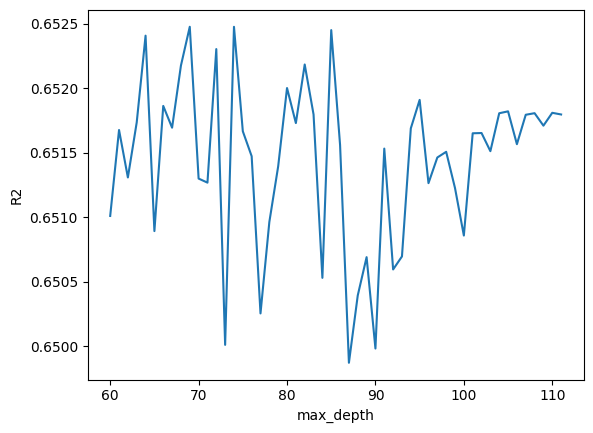

In [149]:
# Visualizar qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [150]:
#Afinar estimadores

# Probamos con 300 árboles y max_depth = 64
rf_300 = RandomForestRegressor(max_depth = 64, n_estimators= 300, random_state = 42)
# Ajusten el modelo
rf_300.fit(X_train, y_train)
# Puntuaciones
rf_300_train_score = rf_300.score(X_train, y_train)
rf_300_test_score = rf_300.score(X_test, y_test)
print(rf_300_train_score)
print(rf_300_test_score)

0.9590086157987261
0.656744420615045


Se realiza ajuste de hiperparámetros obteniendo un resultado mas ajustado y optimizado. Con este cambio se procede con la predicción

In [151]:
#Predicción de nuevos valores
RF_predict= rf_300.predict(X_test)

**Árbol de Regresión**

In [152]:
#Instanciar modelo
dec_tree = DecisionTreeRegressor(random_state = 42)

#Hiperparámetros
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [153]:
#Entrenar modelo
dec_tree.fit(X_train, y_train)

#Predecir datos
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [154]:
# Evaluar el modelo
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.5296628233027711


In [155]:
# Parámetros para ajustar modelo
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    score2 = dec_tree.score(X_train, y_train)
    r2.append(score)

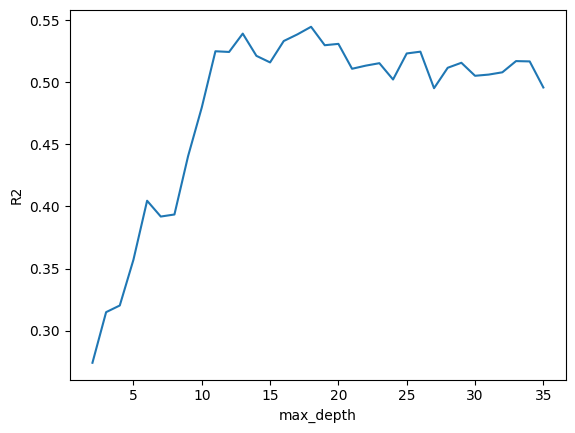

In [156]:
# Visualizar qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [157]:
# Modelo con nuestro valor optimizado para max_depth
dec_tree_18 = DecisionTreeRegressor(max_depth = 18, random_state = 42)
dec_tree_18.fit(X_train, y_train)
train_18_score = dec_tree_18.score(X_train, y_train)
test_18_score = dec_tree_18.score(X_test, y_test)
print(train_18_score)
print(test_18_score)

0.859631339934477
0.5448136213051069


Se realiza ajuste de hiperparámetros obteniendo un resultado mas ajustado y optimizado. Con este cambio se procede con la predicción

In [158]:
#Nueva Prediccoón
train_preds_AR2 = dec_tree_18.predict(X_train)
test_preds_AR2 = dec_tree_18.predict(X_test)
test_preds_AR2

array([ 0.06824855,  0.06824855, -0.32985658, ...,  0.45861858,
       -0.32985658, -0.35074461])

**Metricas**

Se generan funciones para construir resumen de metricas para diferentes modelos

In [159]:
# metrics 

import numpy as np 
import pandas as pd

# metrics


def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)


def mse(targets, predictions) -> float:
    """
    Calculo de la metrica: mean squared error (MSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round((error ** 2).mean(), 4)


def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)


# b) Percentage errors

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)


def maape(targets, predictions) -> float:
    """
    Calculo de la metrica:  mean arctangent percentage error  (MAAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """

    error = predictions - targets

    if any((x, y) == (0, 0) for x, y in zip(predictions, targets)):
        return np.inf

    else:
        return round(np.arctan(np.abs(error / targets)).mean(),4)


def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)


def mmape(targets, predictions) -> float:
    """
    Calculo de la metrica: modified mean absolute percentage error (MMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = np.abs(predictions - targets)
    denom = 1 + np.abs(targets)

    return round(np.mean(error / denom),4)


def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)

def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['mse'] = [round(mse(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['maape'] = [round(maape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['mmape'] = [round(mmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    # nombre del modelo por defecto
    #try:
    #    model = df['model'][0]
    #    df_result['model'] = [model]
    #except:
    #    df_result['model'] = ['---']

    return df_result

In [160]:
class SklearnRegressionModels:
    def __init__(self,model,name_model):

        self.model = model
        self.name_model = name_model
        
    @staticmethod
    def test_train_model(X,y,n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=n_size , random_state=42)
        return X_train, X_test, y_train, y_test
    
    def fit_model(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        return self.model.fit(X_train, y_train) 
    
    def df_testig(self,X,y,test_size):
        X_train, X_test, y_train, y_test = self.test_train_model(X,y,test_size )
        model_fit = self.model.fit(X_train, y_train)
        preds = model_fit.predict(X_test)
        df_temp = pd.DataFrame(
            {
                'y':y_test,
                'yhat': model_fit.predict(X_test)
            }
        )
        
        return df_temp
    
    def metrics(self,X,y,test_size):
        df_temp = self.df_testig(X,y,test_size)
        df_metrics = summary_metrics(df_temp)
        df_metrics['r2'] =  round(r2_score(df_temp['y'],df_temp['yhat']),4)

        df_metrics['model'] = self.name_model
        
        return df_metrics

    def parameters(self,X,y,test_size):
        model_fit = self.fit_model(X,y,test_size)
        
        list_betas = [
             ('beta_0',model_fit.intercept_)
                ]
            
        betas = model_fit.coef_
        
        for num, beta in enumerate(betas):
            name_beta = f'beta_{num+1}'
            list_betas.append((name_beta,round(beta,2)))

        result = pd.DataFrame(
            columns = ['coef','value'],
            data = list_betas
        )
        
        result['model'] = self.name_model
        return result 

In [161]:
# dataframe
X = df_processed
Y = y

In [162]:
# models: Teniendo encuenta la opimización de hiperparámetros se crea el siguiente resumen de modelos
reg_Bg = BaggingRegressor(n_estimators= 29, random_state = 42)
reg_RF = RandomForestRegressor(max_depth = 64, n_estimators= 300, random_state = 42)
reg_tree = DecisionTreeRegressor(max_depth = 18, random_state = 42)


list_models =[
    [reg_Bg ,'Bagging_Regressor'],
    [reg_tree,'decision_tree'],
    [reg_RF,'Random_Forest'],
]

In [163]:
frames_metrics = []

for model,name_models in list_models:
    fit_model =  SklearnRegressionModels( model,name_models)
    frames_metrics.append(fit_model.metrics(X,y,0.2))

In [164]:
# resultados: metricas
pd.concat(frames_metrics)

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2,model
0,0.2304,0.3460,0.5882,0.8123,0.3218,14.1773,0.1247,0.4439,0.6677,Bagging_Regressor
0,0.3054,0.5021,0.7086,1.1812,0.4376,18.7904,0.1788,0.6171,0.5178,decision_tree
0,0.2293,0.3501,0.5917,0.7625,0.3190,14.1110,0.1230,0.4412,0.6637,Random_Forest


Basados en las anteriores métricas, podemos concluir que el mejor modelo es el  Regresión de bosque aleatorio con un r2 de 0.6637, además que esta 0.59 mas cerca de los puntos de datos observados de los valores predichos del modelo y el pronóstico esta errado en un 76,25%, lo cual aunque es el mejor modelo se recomienda mejorar la base de datos para obtener un pronóstico mas acertado. La elección de este modelo se da al tener un aleve diferencia de r2 con el Bagging Regressor, pero un error de pronóstico mas pequeño.

## Conclusiones

* Para esta base de datos desde la correlación se identifican que los datos de entrenamiento no son una muestra representativas de la población, es decir, no hay variables adecuadas para la predicción del precio del carro, además con el resultado del modelo se visualiza un sobre ajuste, por lo que se recomienda buscar otras variables a incorporar para estudios posteriores.

* El mejor modelo de regresión para la predicción de nuestros datos es la Regresión de bosque, aún así tenemos el riesgo alto de una predicción errónea  del 76,25%.


## Recomendaciones

* Se recomienda continuar con el crecimiento de la base de datos, dado que entre mayor sea el número de observaciones, mayor será la precisión y confiabilidad del modelo, y para este caso se requieren variables que tengan mas correlación con el precio de los autos.